# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

C:\Users\Armand\AppData\Local\Temp\ipykernel_19272\866361824.py:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  X = misc.ascent()


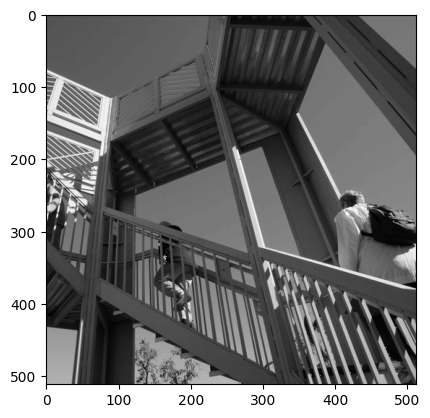

In [2]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

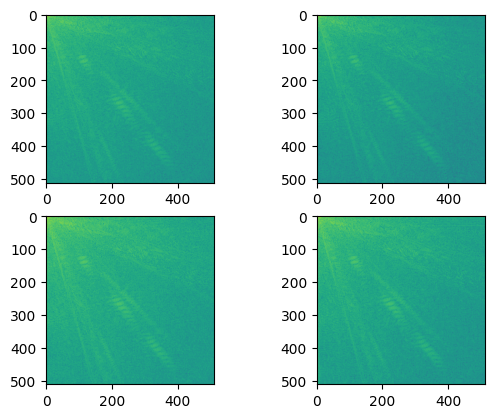

In [3]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

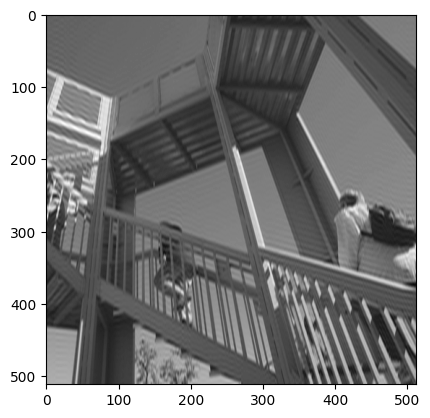

In [4]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

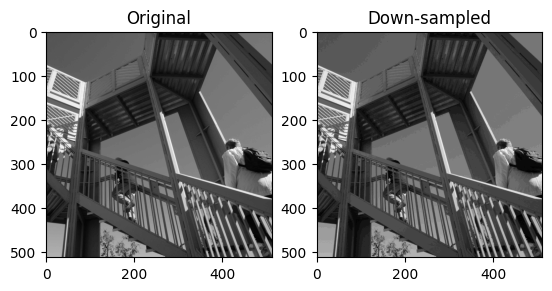

In [5]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

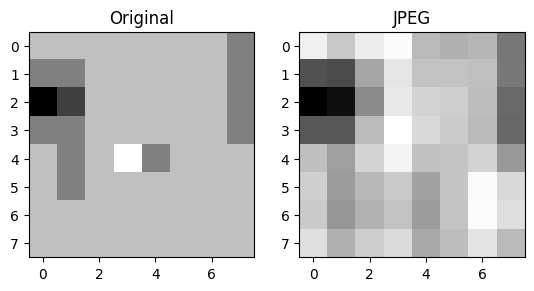

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [6]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

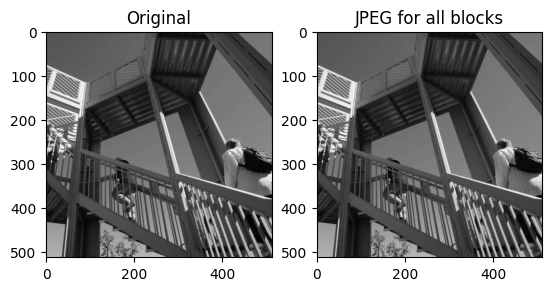

In [7]:
# 1
block_size = 8
height, width = X.shape
i = 0
j = 0
X_jpeg_all_blocks = X.copy()
while i < height:
    while j < width:
        x = X[i:i+block_size, j:j+block_size]
        y = dctn(x)
        y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
        x_jpeg = idctn(y_jpeg)
        X_jpeg_all_blocks[i:i+block_size, j:j+block_size] = x_jpeg
        j += block_size
    i += block_size
    j = 0
plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg_all_blocks, cmap=plt.cm.gray)
plt.title('JPEG for all blocks')
plt.show()

C:\Users\Armand\AppData\Local\Temp\ipykernel_19272\2873649988.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X_color = misc.face()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


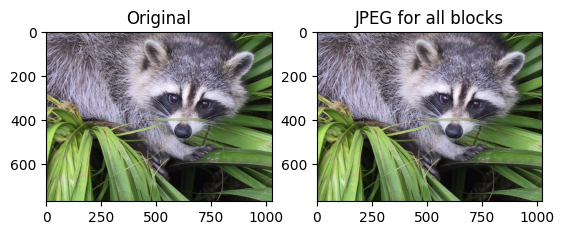

In [11]:
# 2
from skimage.color import rgb2ycbcr, ycbcr2rgb

X_color = misc.face()
X_ycbcr = rgb2ycbcr(X_color)

block_size = 8
height, width, channels = X_ycbcr.shape
c = 0
while c < channels:
    i = 0
    while i < height:
        j = 0
        while j < width:
            x = X_ycbcr[i:i+block_size, j:j+block_size, c]
            y = dctn(x)
            y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
            x_jpeg = idctn(y_jpeg)
            X_ycbcr[i:i+block_size, j:j+block_size, c] = x_jpeg
            j += block_size
        i += block_size
    c += 1

X_jpeg_all_blocks = ycbcr2rgb(X_ycbcr)

plt.subplot(121).imshow(X_color)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg_all_blocks)
plt.title('JPEG for all blocks')
plt.show()

C:\Users\Armand\AppData\Local\Temp\ipykernel_19272\4004112895.py:7: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X_color = misc.face()


15322.121461860515
0.0
Data type of X_color: uint8
Data type of X_jpeg_all_blocks: float64
1 0.0
0.06574054346683694
2 15322.122962978
0.0657463572996031
3 15322.122963691163
0.06627066134436273
4 15322.122980280517
0.06769677885226917
5 15322.123022459244
0.0684443341071545
6 15322.123045782551
0.07264918734649055
7 15322.123183291069
0.09074204860084564
8 15322.123762074609
0.23107816228560482
9 15322.128270521855
0.9890925677967446
10 15322.152033789433
3.461283531081965
11 15322.23126758841
8.814945068720714
12 15322.40168830841
19.057432714606428
13 15322.727342920998


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


36.53182905544866


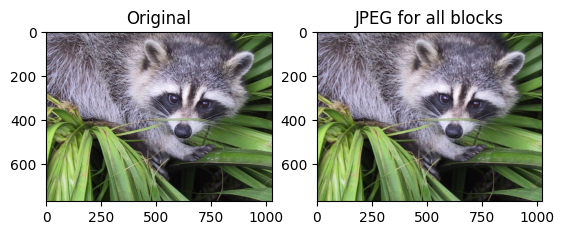

S-au facut 13 iteratii si MSE este 15323.282307785657


In [53]:
# 3
#from skimage.metrics import mean_squared_error

def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

X_color = misc.face()
X_ycbcr = rgb2ycbcr(X_color)
X_jpeg_all_blocks = ycbcr2rgb(X_ycbcr)
print(mse(X_color, X_jpeg_all_blocks))
print(mse(X_color, X_color))

print("Data type of X_color:", X_color.dtype)
print("Data type of X_jpeg_all_blocks:", X_jpeg_all_blocks.dtype)

block_size = 8
height, width, channels = X_ycbcr.shape

target_mse = 15323
current_mse = float(0)

XX = X_ycbcr.copy()

k = 0
while current_mse < target_mse:
    k += 1
    print(k, current_mse)
    c = 0
    maxim = 0
    while c < channels:
        i = 0
        while i < height:
            j = 0
            while j < width:
                x = X_ycbcr[i:i+block_size, j:j+block_size, c]
                y = dctn(x)
                y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
                # compression
                for ii in range(block_size):
                    for jj in range(block_size):
                        if ii+jj > 15-k:
                            y_jpeg[ii][jj] = 0
                x_jpeg = idctn(y_jpeg)
                X_ycbcr[i:i+block_size, j:j+block_size, c] = x_jpeg
                j += block_size
            i += block_size
        c += 1
    print(mse(XX, X_ycbcr))
    X_jpeg_all_blocks = ycbcr2rgb(X_ycbcr)
    current_mse = mse(X_color, X_jpeg_all_blocks)

plt.subplot(121).imshow(X_color)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg_all_blocks)
plt.title('JPEG for all blocks')
plt.show()
print("S-au facut " + str(k) + " iteratii si MSE este " + str(current_mse))


C:\Users\Armand\AppData\Local\Temp\ipykernel_19272\709989207.py:7: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X_color = misc.face()


15322.121461860515
0.0
Data type of X_color: uint8
Data type of X_jpeg_all_blocks: float64
1 0.0
2 0.06574054346683694
3 0.0657463572996031
4 0.06627066134436273
5 0.06769677885226917
6 0.0684443341071545
7 0.07264918734649055
8 0.09074204860084564
9 0.23107816228560482
10 0.9890925677967446
11 3.461283531081965
12 8.814945068720714
13 19.057432714606428


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


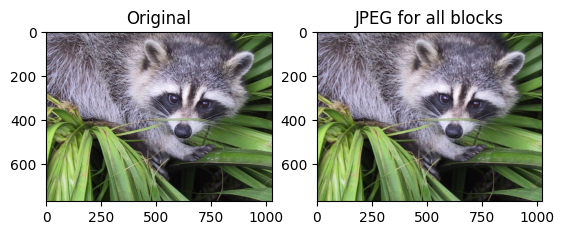

S-au facut 13 iteratii si MSE este 36.53182905544866


In [54]:
# 3 - asa e mai bine decat variante de dinainte
# la fel, dar cu mse calculat intre YCbCr
#from skimage.metrics import mean_squared_error

def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

X_color = misc.face()
X_ycbcr = rgb2ycbcr(X_color)
X_jpeg_all_blocks = ycbcr2rgb(X_ycbcr)
print(mse(X_color, X_jpeg_all_blocks))
print(mse(X_color, X_color))

print("Data type of X_color:", X_color.dtype)
print("Data type of X_jpeg_all_blocks:", X_jpeg_all_blocks.dtype)

block_size = 8
height, width, channels = X_ycbcr.shape

target_mse = 20
current_mse = float(0)

XX = X_ycbcr.copy()

k = 0
while current_mse < target_mse:
    k += 1
    print(k, current_mse)
    c = 0
    maxim = 0
    while c < channels:
        i = 0
        while i < height:
            j = 0
            while j < width:
                x = X_ycbcr[i:i+block_size, j:j+block_size, c]
                y = dctn(x)
                y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
                # compression
                for ii in range(block_size):
                    for jj in range(block_size):
                        if ii+jj > 15-k:
                            y_jpeg[ii][jj] = 0
                x_jpeg = idctn(y_jpeg)
                X_ycbcr[i:i+block_size, j:j+block_size, c] = x_jpeg
                j += block_size
            i += block_size
        c += 1
    X_jpeg_all_blocks = ycbcr2rgb(X_ycbcr)
    current_mse = mse(XX, X_ycbcr)

plt.subplot(121).imshow(X_color)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg_all_blocks)
plt.title('JPEG for all blocks')
plt.show()
print("S-au facut " + str(k) + " iteratii si MSE este " + str(current_mse))


In [ ]:
# 4
